# Excercises from [pandaspractice.com](https://pandaspractice.com/)

In [2]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'name': ['Jeff', 'Esha', 'Jia'], 
                   'age': [30, 56, 8]})
df

,name,age
0,Jeff,30
1,Esha,56
2,Jia,8


### Select column

Now, you want to select just the name column from the DataFrame.

Complete the function, `name_column(df)`, by having it return only the name column.

In [3]:
def name_column(df):
    return df['name']

### Select rows by label (.loc)

You can select the rows of a DataFrame one of two ways. One way is with `df.loc[...]`. `df.loc[...]` selects rows based on their index value. To select a single row, you can do `df.loc[index_value]`, for example, `df.loc[156]`. To select multiple rows, you can do `df.loc[[index_value1, index_value2]]`, for example, `df.loc[[132, 156]]`.

Suppose you constructed a DataFrame by

Complete the function, `select_Jia_row(df)`, by having it return the row with Jia in it. This should involve hard-coding the index value associated with Jia.

In [4]:
def select_Jia_row(df):
    return df.loc[27]

### Select rows by position (.iloc)

To select a single row, you can do `df.iloc[position]`, for example, `df.loc[1]` selects the row with Esha below. To select multiple rows, you can do `df.iloc[[position1, position2]]`, for example, `df.loc[[0, 2]]`.

Complete the function, `select_first_row(df)`, by having it return the first row in the DataFrame.

In [5]:
def select_first_row(df):
    return df.iloc[0]

### Aggregate a column

What is the minimum value of age? Define a variable `min_ag`e with the value of `df.age.min()` would output.

In [6]:
min_age = df.age.min()

### Creating a new column

Write a function, `add_can_drive(df)` which takes in the DataFrame and returns a new DataFrame with a *column can_drive which is True if the person is 16 or older and False otherwise*.

In [7]:
def add_can_drive(df):
  df['can_drive'] = df['age'] >= 16
  return df

another variant:

In [8]:
def add_can_drive(df):
  df['can_drive'] = [True if x >= 16 else False for x in df['age']]
  return df

### Modify a column

Write a function, `age_in_days(df)` which takes in the DataFrame and returns a new DataFrame with the column age modified to be in terms of days instead of years.

In [9]:
def age_in_days(df):
  df['age'] = [x * 365 for x in df['age']] 
  return df

In [10]:
age_in_days(df)

,name,age
0,Jeff,10950
1,Esha,20440
2,Jia,2920


second variant:

In [11]:
def age_in_days2(df):
  df['age'] *= 365
  return df

In [12]:
age_in_days2(df)

,name,age
0,Jeff,3996750
1,Esha,7460600
2,Jia,1065800


## Filter rows

Write a function, `only_names_that_start_with_j(df`) which takes in the DataFrame and returns a new DataFrame with rows of names that start with 'J'. Hint: the pandas `.str` functions would be helpful here.

In [16]:
def only_names_that_start_with_j(df):
  df = df[df.name.str.startswith('J')]
  return df

In [17]:
only_names_that_start_with_j(df)

,name,age
0,Jeff,3996750
2,Jia,1065800


second variant:

In [18]:
def only_names_that_start_with_j2(df):
  filt1 = df['name'].str.startswith('J')
  df = df.loc[filt1]
  return df

## Select rows by boolean expressions

Complete the function, `select_target_audience(df)`, by having it return the rows with people who are **between 21 and 40** years old (inclusive) and live in **New York or Tokyo**.

In [19]:
df = pd.DataFrame({'name': ['Jeff', 'Esha', 'Jia', 'Hatori', 'Ashley'], 
                   'age': [30, 56, 8, 38, 20],
                   'city': ['New York', 'Atlanta', 'Shanghai', 'Tokyo', 'New York']})

In [20]:
def select_target_audience(df):
    df = df[(df.age >=21) & (df.age <=40) & (df.city == 'New York') | (df.city == 'Tokyo')]
    return df  

In [21]:
select_target_audience(df)

,name,age,city
0,Jeff,30,New York
3,Hatori,38,Tokyo


You can make complex boolean (true/false) expressions to select or filter rows in your DataFrame. For example, if our DataFrame had a column age, we could select people who are 16 or older by doing `df[df.age >= 16]`. But suppose we wanted people who are 16 and older and live in New York. Then we could select them by doing `df[(df.age >= 16) & (df.city == 'New York')]`. The & in that expression means "and", | means "or" and ~ means "not". Unfortunately, you can't use the python operators and, or, and not with Pandas objects.

One gotcha about using & (and) and | (or) to make boolean expressions in Pandas is that you need to wrap each piece between a & or | in parenthesis. This is an unfortunate issue due to the way python evaluates operators. If you are interested, you can read more about it here. In either case, remember to wrap each piece in parenthesis!

## Conditional column update

Suppose we realize after collecting a bunch of data that our process incorrectly set the age of people in New York and Atlanta one year less than it was suppose to. Complete the function, correct_age_in_error_cities(df), by having it increment the age of people living in New York or Atlanta by one year.

In [22]:
df = pd.DataFrame({'name': ['Jeff', 'Esha', 'Jia', 'Hatori', 'Ashley'], 
                   'age': [30, 56, 8, 38, 20],
                   'city': ['New York', 'Atlanta', 'Shanghai', 'Tokyo', 'New York']})

In [23]:
def correct_age_in_error_cities(df):
    df.loc[((df['city']=='New York')| (df['city']=='Tokyo')),'age']=df['age']+1
    return df

In [24]:
correct_age_in_error_cities(df)

,name,age,city
0,Jeff,31,New York
1,Esha,56,Atlanta
2,Jia,8,Shanghai
3,Hatori,39,Tokyo
4,Ashley,21,New York


## Bucketing values using cut


Write a function, add_age_bracket(df) which takes in the DataFrame and returns a DataFrame with an additional column age_bracket where the brackets are:

"0-10"  
"11-18"  
"19-30"  
"31-50"  
"51-65"  
"66-80"  
"81-120"  

In [25]:
df = pd.DataFrame({'name': ['Jeff', 'Esha', 'Jia', 'Hatori', 'Ashley'], 
                   'age': [30, 56, 8, 38, 20],
                   'city': ['New York', 'Atlanta', 'Shanghai', 'Tokyo', 'New York']})

1st variant with tuples

In [26]:
def add_age_bracket(df):
  bins = pd.IntervalIndex.from_tuples([(0,10), (11,18), (19,30), (31,50), (51,65), (66,80), (81,120)]) 
  df['age_bracket'] = pd.cut(df['age'], bins)
  return df

In [27]:
add_age_bracket(df)

,name,age,city,age_bracket
0,Jeff,30,New York,"(19, 30]"
1,Esha,56,Atlanta,"(51, 65]"
2,Jia,8,Shanghai,"(0, 10]"
3,Hatori,38,Tokyo,"(31, 50]"
4,Ashley,20,New York,"(19, 30]"


2nd varinat with labels

In [28]:
def add_age_bracket(df):
    bins=[0, 10, 18, 30, 50, 65, 80, 120]
    labels=['0-10', '11-18', '19-30', '31-50', '51-65', '66-80', '81-120']
    df['age_bracket'] = pd.cut(df['age'], bins, labels=labels)
    return df

In [29]:
add_age_bracket(df)

,name,age,city,age_bracket
0,Jeff,30,New York,19-30
1,Esha,56,Atlanta,51-65
2,Jia,8,Shanghai,0-10
3,Hatori,38,Tokyo,31-50
4,Ashley,20,New York,19-30


## Map a function over each row

You can apply a function to each row in a DataFrame using `df.map(function)`

Write a function, `add_name_reverse_name(df)` that adds a new column, name_reverse_name to the DataFrame which is the concatenation of the person's name and the reverse of their name. For example, "Jeff" would be "JeffffeJ

In [30]:
import pandas as pd

df = pd.DataFrame({'name': ['Jeff', 'Esha', 'Jia'], 
                   'age': [30, 56, 8]})

`[::-1]` - reverse string or other values

In [31]:
def add_name_reverse_name(df):
  df['name_reverse_name'] = df['name'].map(lambda x: x + x[::-1])
  return df

In [32]:
add_name_reverse_name(df)

,name,age,name_reverse_name
0,Jeff,30,JeffffeJ
1,Esha,56,EshaahsE
2,Jia,8,JiaaiJ


## Impute missing values

Imputing data is replacing missing data with substituted values. Missing data is typically represented by a value nan (not a number). Keep in mind, depending on the dataset, missing values can be represented differently. You can replace nan values using the function `fillna`

Write a function, `fillna_age_with_mean(df)` which takes in the DataFrame and updates the column age so that nan rows are set to the mean age of all the rows.

In [229]:
import numpy as np
df = pd.DataFrame({'name': ['Jeff', 'Esha', 'Jia', 'Bobby'], 
                   'age': [30, 56, 8, np.nan]})

In [230]:
import pandas as pd
import numpy as np

def fillna_age_with_mean(df):
  df = df['age'].fillna(df['age'].mean())
  return df

In [241]:
fillna_age_with_mean(df)

0    30.000000
1    56.000000
2     8.000000
3    31.333333
Name: age, dtype: float64

## Melt a wide table to long table


Pandas has a function, `melt`, which can be thought of as the opposite of pivot. It takes a table with multiple columns and converts it into a table where the column and value are represented as rows.

**Task**: Write a function, `melter(df)` which takes in the DataFrame, df and melts all the columns into rows. The resulting table should have two columns, variable and value.

In [36]:
df = pd.DataFrame({'a': [1, 2], 'b': [5, 6], 'c': [9, 10]})

In [37]:
def melter(df):
  return df.melt()

In [38]:
melter(df)

,variable,value
0,a,1
1,a,2
2,b,5
3,b,6
4,c,9
5,c,10


## Find NaN rows

Write a function, `na_rows(df)` which takes in the DataFrame, df and returns only the rows that have at least one missing (None or NaN) element.

In [39]:
df = pd.DataFrame({'count': [np.NaN, 2, 3], 'fruit': ['apple', None, 95]})

In [40]:
def na_rows(df):
  df = df[df.isna().any(axis=1)]
  return df

In [41]:
na_rows(df)

,count,fruit
0,NaN,apple
1,2.0,None


## Preparing a heatmap

You have a table of results from optimizing two hyperparameters of a machine learning algorithm. The table looks like

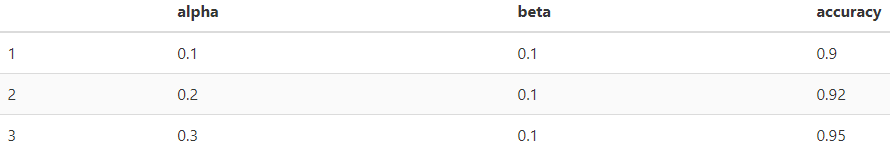

Which was generated by looping over values of both alpha and beta and calculating the accuracy given those settings.

In [176]:
results = []
for alpha in np.round(np.linspace(0, 1, 4), 1):
    for beta in np.round(np.linspace(0, 1, 4), 1):
        alpha_contrib = 0.5 - (alpha - 0.5)**2
        beta_contrib = 0.5 - (beta - 0.8)**2
        acc = np.minimum(1, alpha_contrib+beta_contrib+np.random.randn()*0.01)
        results.append(dict(alpha=alpha, beta=beta, accuracy=acc))
df = pd.DataFrame(results)

In [177]:
df

,alpha,beta,accuracy
0,0.0,0.0,0.120106
1,0.0,0.3,0.477065
2,0.0,0.7,0.749790
3,0.0,1.0,0.709770
4,0.3,0.0,0.322358
5,0.3,0.3,0.705023
6,0.3,0.7,0.948773
7,0.3,1.0,0.918517
8,0.7,0.0,0.302878
9,0.7,0.3,0.712140


Write a function, `prepare_for_heatmap(df)` which has one column for each value of alpha, one row for each value of beta and the accuracy associated with the pair as the value.

In [180]:
def prepare_for_heatmap(df):
    pivot_df = df.pivot_table(index='beta', columns='alpha', values='accuracy').rename_axis(index=None)
    return pivot_df

In [179]:
prepare_for_heatmap(df)

beta,0.0,0.3,0.7,1.0
0.0,0.120106,0.477065,0.749790,0.709770
0.3,0.322358,0.705023,0.948773,0.918517
0.7,0.302878,0.712140,0.950739,0.909200
1.0,0.117626,0.506285,0.734329,0.705285


## Customer Lifespan

Customer life span is an important metric businesses with recurring customers track to make projections and is used in calculating the life time value (LTV) of a customer.

Suppose we have a table with four columns, `['date', 'customer_id', 'order_num', 'order_amount_dollars']`

In [181]:
df = pd.DataFrame({'date': pd.to_datetime(['2019-08-01', '2019-08-05', '2019-09-01']),
                                          'customer_id': [1, 2, 1],
                                          'order_num': [1, 2, 3],
                                          'order_amount_dollars': [30, 40, 30]})

We are interested in calculating the average duration a person remains a customer.

Write a function `avg_life_span(df)` which takes a dataframe and returns the average life span of the customers in the dataframe.

In [183]:
df

,date,customer_id,order_num,order_amount_dollars
0,2019-08-01,1,1,30
1,2019-08-05,2,2,40
2,2019-09-01,1,3,30


In [191]:
df.groupby(['customer_id'], as_index=False).agg({'date': 'mean'})

,customer_id,date
0,1,2019-08-16 12:00:00
1,2,2019-08-05 00:00:00


In [192]:
type(df.date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [203]:
def avg_life_span(df):
    lifespan = (df.date.max() - df.date.min()) / df.customer_id.nunique()
    return lifespan

In [204]:
avg_life_span(df)

Timedelta('15 days 12:00:00')